In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Import dependencies
%matplotlib inline
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

In [3]:
##Bring in csv file for consumption data
consumption = pd.read_csv("../input_data/consumption.csv")

#Bring in csv file for emissions data
emissions = pd.read_csv("../input_data/emissions.csv")


# View and Prepare the Data

In [4]:
##View the first 5 rows of consumption data
consumption.head()

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,64,62,68,71,78,97,100,101,431,1812,3425
1,AK,2,3,3,3,3,3,3,3,14,20,28
2,AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326,70800
3,AR,53,59,80,85,100,108,111,124,372,442,2118
4,CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408,381733


In [5]:
##View the first 5 rows of emissions data
emissions.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
1,AK,39.435905,37.788246,38.729384,38.585774,38.039447,35.975289,35.171091,36.067852,34.739390,34.295441
2,AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
3,AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
4,CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489


In [6]:
##Clean up consumption data to match fields in emissions data(rename column 1 to State, delete 2018 column)
consumption= consumption.rename(columns={"Unnamed: 0": "State"})

consumption.drop('2018', axis=1, inplace=True)
consumption.head()



,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,64,62,68,71,78,97,100,101,431,1812
1,AK,2,3,3,3,3,3,3,3,14,20
2,AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326
3,AR,53,59,80,85,100,108,111,124,372,442
4,CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408


In [7]:
##Set state as the index in both dataframes
emissions.set_index("State", inplace=True)
consumption.set_index("State", inplace=True)

In [10]:
print(f"Number of emissions rows: {len(emissions)}")
print(f"Number of consumption rows: {len(consumption)}")

Number of emissions rows: 51
Number of consumption rows: 51


# Look for correlations

In [41]:
##Create a function to make scatterplots for each year
def scatterplots():
    plt.scatter(consump, emiss)
    plt.xlabel("Solar Consumption")
    plt.ylabel("Emissions")
    plt.title(f"Emissions vs. Solar Consumption for {year}")
    plt.show()


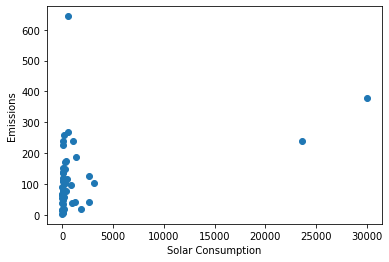

In [43]:
##2008 -- First year
emiss = emissions["2008"]
consump = consumption["2008"]
year = "2008"
scatterplots()


No observable correlation between Solar Consumption and Emissions in 2008

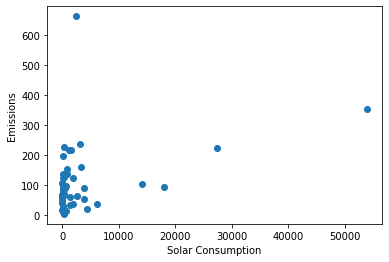

In [44]:
##2012 - A year in the middle
emiss = emissions["2012"]
consump = consumption["2012"]
year = "2012"
scatterplots()

No observable correlation between Solar Consumption and Emissions in 2012

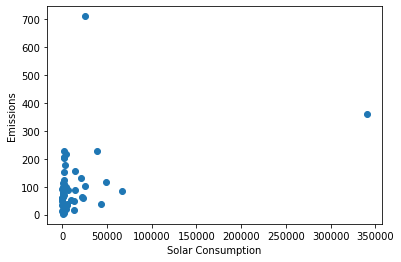

In [45]:
##2017 -- The last year we have data for
emiss = emissions["2017"]
consump = consumption["2017"]
year = "2017"
scatterplots()

No observable correlation between Solar Consumption and Emissions in 2017

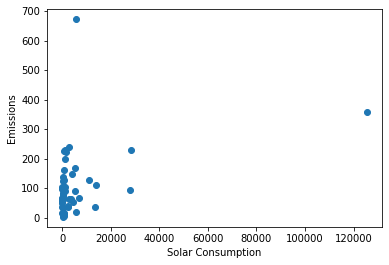

In [46]:
##Compare the average emissions to the average consumption over the 10 years
emiss = emissions.mean(axis=1)
consump = consumption.mean(axis=1)
year = "All Years"
scatterplots()

No observable correlation between the average Solar Consumption and the average Emissions 

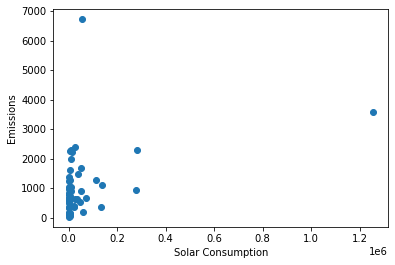

In [47]:
##Compare the total emissions to the total consumption over the 10 years
emiss = emissions.sum(axis=1)
consump = consumption.sum(axis=1)
year = "All Years"
scatterplots()

No observable correlation between the Total Solar Consumption and the Total Emissions 

In [ ]:
##Calculate change in emissions from 2008 to 2017 and capture the 5 states with largest changes and 5 smallest changes
emis_change = emissions['2017']-emissions['2008']
emis_change = emis_change.sort_values(0, ascending=False)
top_five_emis = emis_change.head()
bottom_five_emis = emis_change.tail()
bottom_five_emis

# Calculate emissions to consumption percentages and analyze the results

In [11]:
##Merge the 2 dataframes
merged_df = pd.merge(emissions, consumption, how='inner', on='State', suffixes=('_emis', '_con'))

merged_df.head()
merged_df.dtypes

2008_emis    float64
2009_emis    float64
2010_emis    float64
2011_emis    float64
2012_emis    float64
2013_emis    float64
2014_emis    float64
2015_emis    float64
2016_emis    float64
2017_emis    float64
2008_con       int64
2009_con       int64
2010_con       int64
2011_con       int64
2012_con       int64
2013_con       int64
2014_con       int64
2015_con       int64
2016_con       int64
2017_con       int64
dtype: object

In [14]:
##Calculate the percentage of emissions to consumption
emis_to_con_2008 = round((merged_df["2008_emis"]/merged_df["2008_con"])*100 ,2)
emis_to_con_2009 = round((merged_df["2009_emis"]/merged_df["2009_con"])*100 ,2)
emis_to_con_2010 = round((merged_df["2010_emis"]/merged_df["2010_con"])*100 ,2)
emis_to_con_2011 = round((merged_df["2011_emis"]/merged_df["2011_con"])*100 ,2)
emis_to_con_2012 = round((merged_df["2012_emis"]/merged_df["2012_con"])*100 ,2)
emis_to_con_2013 = round((merged_df["2013_emis"]/merged_df["2013_con"])*100 ,2)
emis_to_con_2014 = round((merged_df["2014_emis"]/merged_df["2014_con"])*100 ,2)
emis_to_con_2015 = round((merged_df["2015_emis"]/merged_df["2015_con"])*100 ,2)
emis_to_con_2016 = round((merged_df["2016_emis"]/merged_df["2016_con"])*100 ,2)
emis_to_con_2017 = round((merged_df["2017_emis"]/merged_df["2017_con"])*100 ,2)


In [15]:
##Create a new dataframe with the percentage results
percent_df = pd.DataFrame({
    "2008": emis_to_con_2008,
    "2009": emis_to_con_2009,
    "2010": emis_to_con_2010,
    "2011": emis_to_con_2011,
    "2012": emis_to_con_2012,
    "2013": emis_to_con_2013,
    "2014": emis_to_con_2014,
    "2015": emis_to_con_2015,
    "2016": emis_to_con_2016,
    "2017": emis_to_con_2017
})
percent_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,218.23,193.58,195.18,182.83,157.74,124.47,123.08,118.82,26.65,6.02
AK,1971.80,1259.61,1290.98,1286.19,1267.98,1199.18,1172.37,1202.26,248.14,171.48
AZ,3.28,2.71,2.11,1.23,0.50,0.30,0.21,0.19,0.16,0.13
AR,120.87,104.01,82.15,79.02,65.94,63.29,62.15,47.72,16.75,14.54
CA,1.27,1.17,1.00,0.83,0.65,0.42,0.22,0.17,0.13,0.11


In [18]:
##Calculate the average emission vs consumption across all of the years for each state
percent_df["Average"] = percent_df.mean(axis=1)
percent_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
State,,,,,,,,,,,
AL,218.23,193.58,195.18,182.83,157.74,124.47,123.08,118.82,26.65,6.02,134.660
AK,1971.80,1259.61,1290.98,1286.19,1267.98,1199.18,1172.37,1202.26,248.14,171.48,1106.999
AZ,3.28,2.71,2.11,1.23,0.50,0.30,0.21,0.19,0.16,0.13,1.082
AR,120.87,104.01,82.15,79.02,65.94,63.29,62.15,47.72,16.75,14.54,65.644
CA,1.27,1.17,1.00,0.83,0.65,0.42,0.22,0.17,0.13,0.11,0.597


In [20]:
##Sort by the average
percent_df = percent_df.sort_values('Average')
percent_df.head()
lowest_emis_to_con = percent_df.head()
highest_emis_to_con = percent_df.tail()

In [21]:
lowest_emis_to_con


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
State,,,,,,,,,,,
HI,1.07,0.93,0.82,0.68,0.44,0.30,0.24,0.22,0.19,0.14,0.503
CA,1.27,1.17,1.00,0.83,0.65,0.42,0.22,0.17,0.13,0.11,0.597
NV,1.54,1.38,1.11,0.79,0.57,0.41,0.32,0.19,0.11,0.08,0.650
FL,1.01,0.96,0.98,0.88,0.81,0.78,0.76,0.77,0.74,0.60,0.829
AZ,3.28,2.71,2.11,1.23,0.50,0.30,0.21,0.19,0.16,0.13,1.082


In [22]:
highest_emis_to_con

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
State,,,,,,,,,,,
OK,463.93,422.37,404.99,345.23,289.43,214.58,212.93,141.53,83.95,24.43,260.337
MS,536.30,502.13,500.62,354.27,344.72,177.44,181.89,223.79,93.81,7.51,292.248
WY,1336.30,1589.59,1085.81,1065.91,441.60,284.84,272.84,235.41,184.25,135.59,663.214
ND,1769.75,1290.76,1311.48,1348.01,938.47,813.41,842.27,823.01,780.49,807.53,1072.518
AK,1971.80,1259.61,1290.98,1286.19,1267.98,1199.18,1172.37,1202.26,248.14,171.48,1106.999


In [24]:
##Create Groups by emission to consumption percentages for comparision
percent_df["Average"]

State
HI       0.503
CA       0.597
NV       0.650
FL       0.829
AZ       1.082
NJ       1.516
OR       1.999
CT       2.254
VT       2.760
CO       3.703
DC       4.106
NY       6.018
MA       6.085
DE       6.508
NM       7.995
RI       8.599
ME       8.686
NH      12.919
PA      14.173
IL      14.757
VA      15.804
NC      16.175
MD      18.014
GA      23.523
MI      24.698
WI      25.850
MN      28.720
WA      29.781
ID      36.567
OH      40.349
TX      42.676
UT      47.604
MT      58.092
AR      65.644
IN      85.596
LA     108.561
TN     113.949
SC     128.007
AL     134.660
NE     135.602
KY     135.978
WV     145.144
MO     160.026
IA     161.583
KS     169.592
SD     222.446
OK     260.337
MS     292.248
WY     663.214
ND    1072.518
AK    1106.999
Name: Average, dtype: float64

In [25]:
##Separate the states into groups by emission/consumption percentages and create a new column. 
bins = [0, 10, 50, 500, 1200]

group_labels = ["Low Emis %", "Medium Emis %", "High Emis %", "Very High %"]

percent_df["Category"] = pd.cut(percent_df["Average"], bins, labels=group_labels)
percent_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average,Category
State,,,,,,,,,,,,
HI,1.07,0.93,0.82,0.68,0.44,0.30,0.24,0.22,0.19,0.14,0.503,Low Emis %
CA,1.27,1.17,1.00,0.83,0.65,0.42,0.22,0.17,0.13,0.11,0.597,Low Emis %
NV,1.54,1.38,1.11,0.79,0.57,0.41,0.32,0.19,0.11,0.08,0.650,Low Emis %
FL,1.01,0.96,0.98,0.88,0.81,0.78,0.76,0.77,0.74,0.60,0.829,Low Emis %
AZ,3.28,2.71,2.11,1.23,0.50,0.30,0.21,0.19,0.16,0.13,1.082,Low Emis %


In [30]:
##Group by the emissions to consumption percent categories
emission_group = percent_df.groupby("Category")

##Find out how many in each group
print(emission_group["Average"].count())

Category
Low Emis %       17
Medium Emis %    15
High Emis %      16
Very High %       3
Name: Average, dtype: int64


<AxesSubplot:title={'center':'Average'}, xlabel='Category'>

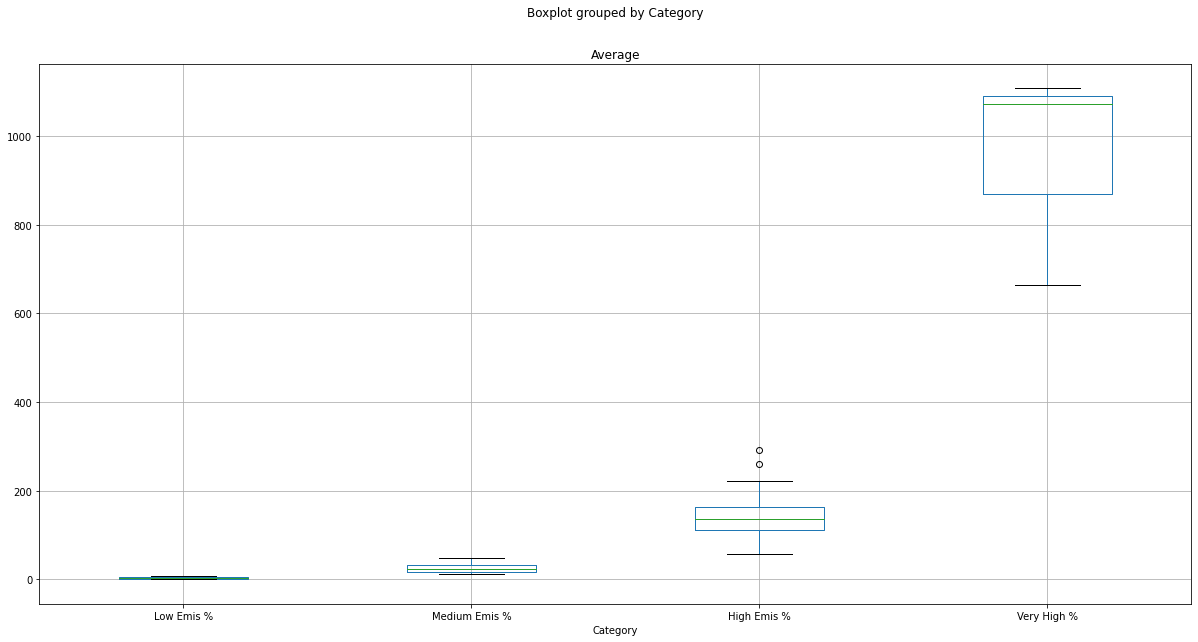

In [32]:
#Create a boxplot to compare means of Averages
percent_df.boxplot("Average", by="Category", figsize=(20,10))

In [33]:
##Extract individual groups
group1 = percent_df[percent_df["Category"] == "Low Emis %"]["Average"]
group2 = percent_df[percent_df["Category"] == "Medium Emis %"]["Average"]
group3 = percent_df[percent_df["Category"] == "High Emis %"]["Average"]
group4 = percent_df[percent_df["Category"] == "Very High %"]["Average"]

In [34]:
##Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=204.38901374513216, pvalue=5.77959268953557e-27)